In [1]:
import numpy as np
import matplotlib.pyplot as plt
from classy import Class

In [2]:
common_settings_DCDM = {'omega_b':0.0223828,'100*theta_s':1.0399625783900215,
                   'A_s':2.100549e-09,'n_s':0.9660499,'tau_reio':0.05430842,
                   'N_ur':2.046,'N_ncdm':1,'m_ncdm':0.06,'T_ncdm':0.7137658555036082,'YHe':'BBN',
                   'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_1/Mpc':10.0,'non linear':'halofit', 'omega_cdm':0}

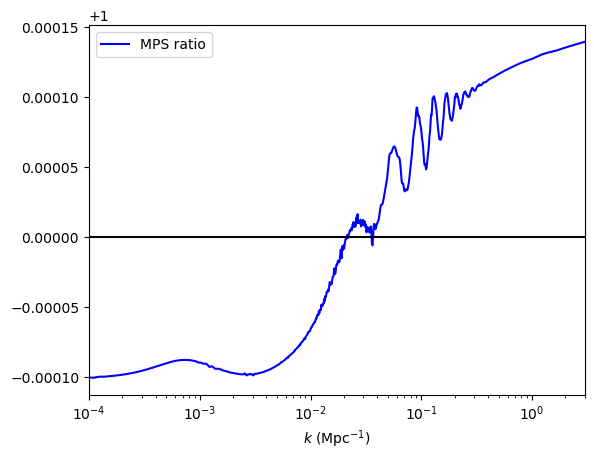

In [14]:
fig, ax = plt.subplots()
kk = np.logspace(-4, np.log10(3), 1000)
f = open('COFI.txt', 'r')

COFI = Class()
COFI.set(common_settings_DCDM)
COFI.set({'omega_dcdmdr':0.015179345936327863, 'Gamma_dcdm': 1e3})
COFI.compute()

h = COFI.h()
MPS_original = np.array([COFI.pk_lin(k*h,0)*h**3 for k in kk])
MPS_COFI = []

while True:
    l = f.readline().strip().split(',')
    if l[0] == '':
        break
    pk = float(l[0])
    MPS_COFI.append(pk)
MPS_COFI = np.array(MPS_COFI)
back = COFI.get_background()

#plt.plot(kk, MPS_original, color = 'r', label = "Original CLASS")
#plt.plot(kk, MPS_COFI, color = 'b', label = "COFI")
plt.plot(kk, (MPS_COFI)/(MPS_original), label = 'MPS ratio', color = 'blue')
plt.hlines(1, 1e-4, 3, color = 'black')
plt.xlim(1e-4, 3)
plt.xlabel(r'$k$ (Mpc$^{-1}$)')
#plt.ylabel(r'$P(k)$ (h$\cdot$Mpc$^{-1}$)$^3$')
plt.legend(loc = 0)
plt.xscale('log')
plt.savefig('compare.pdf')



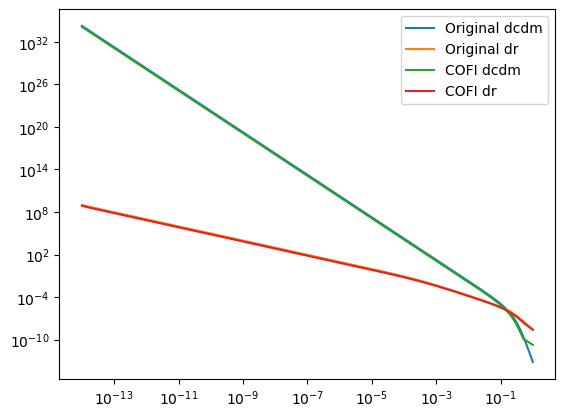

In [29]:
f = open('rho.txt', 'r')

rhodm_COFI = []
rhodr_COFI = []

while True:
    l = f.readline().strip().split(',')
    if  l[0] == '':
        break
    rhodm_COFI.append(float(l[0]))
    rhodr_COFI.append(float(l[1]))

z = back['z']
a = 1/(1+z)
rho = back['(.)rho_dcdm']
rho_dr = back['(.)rho_dr']
plt.plot(a, rho, label = 'Original dcdm')
plt.plot(a, rho_dr, label = 'Original dr')
plt.plot(a, rhodm_COFI, label = 'COFI dcdm')
plt.plot(a, rhodr_COFI, label = 'COFI dr')
plt.legend(loc=0)
plt.xscale('log')
plt.yscale('log')

In [20]:
z

array([1.00000000e+14, 9.99194400e+13, 9.98389448e+13, ...,
       1.61314959e-03, 8.06249775e-04, 0.00000000e+00])